---
# Análise 01:
**Identificação de Padrões de Erros em Respostas de Estudantes a um Problema Matemático**

Este estudo tem como objetivo analisar as respostas de estudantes a um problema matemático específico:

"Thiago trabalha 5 dias na semana e ganha 12 reais por dia, gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos."

A análise busca identificar os padrões de erros cometidos pelos estudantes, tanto na interpretação do problema quanto na aplicação de estratégias de resolução e cálculos matemáticos. Para isso, foram utilizadas técnicas de clustering, como a Análise de Correspondência Múltipla (ACM) e o algoritmo K-means, para agrupar os estudantes com base na similaridade de suas respostas. Em seguida, foi realizada uma análise detalhada dos erros em cada cluster, com foco especial no Cluster 1, que apresentou a maior incidência de erros.

O objetivo final desta "Análise 01" é fornecer insights sobre as dificuldades dos estudantes na resolução desse tipo de problema e estabelecer uma base para futuras análises e estratégias de intervenção.

## Relatório Detalhado do Estudo: Análise de Erros e Agrupamento de Estudantes

Este relatório detalha um estudo abrangente que visa analisar as respostas de estudantes a um problema matemático, identificando padrões de erros e agrupando os estudantes com base em suas abordagens de resolução. O estudo combina técnicas de aprendizado de máquina não supervisionado e supervisionado para fornecer insights detalhados sobre o desempenho dos estudantes.

**1. Carregamento e Preparação dos Dados:**

* Os dados das respostas dos estudantes foram carregados de um arquivo CSV para um DataFrame pandas, permitindo a manipulação e análise dos dados.
* As colunas relevantes para a análise incluem "Interpretação", "Estratégia", "Cálculo/Técnica" e "Resposta".

**2. Agrupamento de Estudantes com ACM e K-Means:**

* A Análise de Correspondência Múltipla (ACM) foi utilizada para reduzir a dimensionalidade dos dados categóricos, transformando as respostas dos estudantes em coordenadas numéricas em um espaço bidimensional.
* O algoritmo K-Means foi aplicado às coordenadas dos estudantes para agrupá-los em três clusters, com base na similaridade de seus padrões de respostas.
* A coluna "Cluster_ACM_KMeans" foi adicionada ao DataFrame para indicar a qual cluster cada estudante pertence.
* A visualização dos clusters no espaço da ACM permitiu identificar grupos de estudantes com abordagens de resolução semelhantes.

**3. Análise de Erros Detalhada:**

* A coluna "Tipo_Erro_Detalhado" foi criada para categorizar os tipos de erros cometidos pelos estudantes.
* Um loop iterou sobre as respostas dos estudantes no Cluster 1, analisando as colunas "Resposta", "Interpretação" e "Estratégia" para identificar erros específicos.
* Os erros foram categorizados em:
    * Erro de Subtração
    * Erro de Divisão
    * Erro na Ordem das Operações
    * Outro Erro de Cálculo
    * Dificuldade em Identificar Informações Relevantes
    * Dificuldade em Traduzir o Problema para Representação Matemática
    * Compreensão Incorreta do Problema
    * Outro Erro de Interpretação
* A frequência de cada tipo de erro foi calculada, fornecendo informações sobre as dificuldades mais comuns dos estudantes.
* A distribuição dos erros por cluster foi analisada, revelando padrões de erros específicos para cada grupo de estudantes.
* Foi feito uma analise refinada dos erros de calculo, gerando uma nova coluna.
* Foi feita uma analise dos erros de cada cluster individualmente.

**4. Insights e Conclusões:**

* O agrupamento de estudantes com ACM e K-Means revelou padrões distintos de abordagens de resolução, indicando que os estudantes podem ter diferentes níveis de compreensão do problema.
* A análise detalhada de erros identificou dificuldades específicas dos estudantes em áreas como operações matemáticas básicas, interpretação de problemas e tradução de problemas para representações matemáticas.
* A distribuição dos erros por cluster sugere que os estudantes em diferentes grupos podem ter necessidades de aprendizado distintas.
* A frequência dos erros fornece informações sobre as áreas que exigem maior atenção pedagógica.

**5. Próximos Passos:**

* Análise qualitativa aprofundada das respostas dos estudantes para entender o raciocínio por trás dos erros.
* Desenvolvimento de intervenções pedagógicas direcionadas para atender às necessidades específicas de cada cluster.
* Exploração de modelos de processamento de linguagem natural (NLP) para análise mais detalhada das respostas textuais.
* Balanceamento de dados, caso seja necessario.
* Teste de modelos de AutoML para otimização da análise.

Este estudo fornece uma base sólida para a compreensão do desempenho dos estudantes e o desenvolvimento de estratégias de ensino mais eficazes.



---

## Etapa 01



### Problema modelo para o estudo inicial



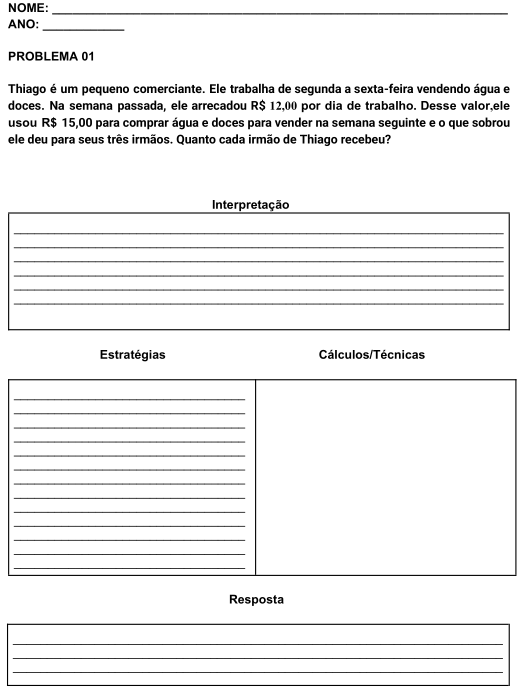

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('/home/laza/simulacao-manguetech-01/estudos/respostas_estudantes.csv')

In [43]:
df

,Nome,Ano,Problema,Interpretação,Estratégia,Cálculo/Técnica,Resposta
0,Estudante 1,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago tem um gasto de 15 reais e ganha 12 rea...,"Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00."
1,Estudante 2,9,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago trabalha 5 dias, ganha 12 por dia, tira...","Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu -R$1,00."
2,Estudante 3,8,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Somar tudo, tirar 15 e dividir por 3.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66."
3,Estudante 4,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago ganha 12 reais por dia de segunda a sex...,"Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu -R$1,00."
4,Estudante 5,7,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago ganha 12 reais por dia de segunda a sex...,"Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00."
...,...,...,...,...,...,...,...
95,Estudante 96,6,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago trabalha 5 dias, ganha 12 por dia, tira...","Multiplicar 12 por 5, subtrair 15 e dividir po...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00."
96,Estudante 97,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66."
97,Estudante 98,7,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago vende água e doces, ganha 12 reais por ...","Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66."
98,Estudante 99,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Multiplicar 12 por 5, subtrair 15 e dividir po...","12 + 5 = 17; 17 - 15 = 2; 2 / 3 = 0,66","Cada irmão recebeu R$15,00."


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nome             100 non-null    object
 1   Ano              100 non-null    int64 
 2   Problema         100 non-null    object
 3   Interpretação    100 non-null    object
 4   Estratégia       100 non-null    object
 5   Cálculo/Técnica  100 non-null    object
 6   Resposta         100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


---

## Etapa 02

---
### Interpretacao

In [45]:
print(df['Interpretação'].value_counts())

Interpretação
Thiago trabalha 5 dias na semana e ganha 12 reais por dia, gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos.    29
Thiago tem um gasto de 15 reais e ganha 12 reais por dia, e tem 3 irmãos.                                                                        21
Thiago vende água e doces, ganha 12 reais por dia, gasta 15 e divide o resto.                                                                    20
Thiago ganha 12 reais por dia de segunda a sexta e gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos.            18
Thiago trabalha 5 dias, ganha 12 por dia, tira 15 e divide o que sobra por 3.                                                                    12
Name: count, dtype: int64


In [46]:
df['Interpretação_Comprimento'] = df['Interpretação'].str.len()
print(df['Interpretação_Comprimento'].describe())

count    100.000000
mean     104.800000
std       31.508216
min       73.000000
25%       77.000000
50%       77.000000
75%      141.000000
max      141.000000
Name: Interpretação_Comprimento, dtype: float64


---

### Estrategia

In [47]:
print(df['Estratégia'].value_counts())

Estratégia
Calcular o total ganho na semana, subtrair o gasto com compras e dividir o valor restante por 3.    41
Ver quanto ele ganha, tirar o gasto e dividir.                                                      24
Multiplicar 12 por 5, subtrair 15 e dividir por 3.                                                  19
Somar tudo, tirar 15 e dividir por 3.                                                               16
Name: count, dtype: int64


In [48]:
df['Estratégia_Comprimento'] = df['Estratégia'].str.len()
print(df['Estratégia_Comprimento'].describe())

count    100.000000
mean      65.820000
std       25.587394
min       37.000000
25%       46.000000
50%       50.000000
75%       96.000000
max       96.000000
Name: Estratégia_Comprimento, dtype: float64


---

### Calculo/Tecnica

In [49]:
print(df['Cálculo/Técnica'].value_counts())

Cálculo/Técnica
12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15    57
12 + 5 = 17; 17 - 15 = 2; 2 / 3 = 0,66    25
12 - 15 = -3; -3 / 3 = -1                 18
Name: count, dtype: int64


In [50]:
df['Cálculo/Técnica_Comprimento'] = df['Cálculo/Técnica'].str.len()
print(df['Cálculo/Técnica_Comprimento'].describe())

count    100.000000
mean      35.660000
std        5.019598
min       25.000000
25%       38.000000
50%       38.000000
75%       38.000000
max       38.000000
Name: Cálculo/Técnica_Comprimento, dtype: float64


---

### Resposta

In [51]:
print(df['Resposta'].value_counts())

Resposta
Cada irmão recebeu R$15,00.    65
Cada irmão recebeu R$0,66.     20
Cada irmão recebeu -R$1,00.    15
Name: count, dtype: int64


In [52]:
df['Resposta_Comprimento'] = df['Resposta'].str.len()
print(df['Resposta_Comprimento'].describe())

count    100.000000
mean      26.800000
std        0.402015
min       26.000000
25%       27.000000
50%       27.000000
75%       27.000000
max       27.000000
Name: Resposta_Comprimento, dtype: float64


---

## ETAPA 03

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import re

### Interpretacao

/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to dup

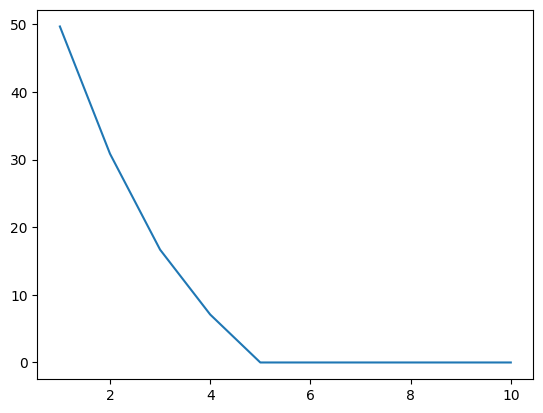

                                       Interpretação  Cluster_Interpretacao
0  Thiago tem um gasto de 15 reais e ganha 12 rea...                      1
1  Thiago trabalha 5 dias, ganha 12 por dia, tira...                      0
2  Thiago trabalha 5 dias na semana e ganha 12 re...                      0
3  Thiago ganha 12 reais por dia de segunda a sex...                      0
4  Thiago ganha 12 reais por dia de segunda a sex...                      0
5  Thiago tem um gasto de 15 reais e ganha 12 rea...                      1
6  Thiago tem um gasto de 15 reais e ganha 12 rea...                      1
7  Thiago tem um gasto de 15 reais e ganha 12 rea...                      1
8  Thiago trabalha 5 dias, ganha 12 por dia, tira...                      0
9  Thiago trabalha 5 dias na semana e ganha 12 re...                      0


In [54]:

textos = df['Interpretação'].tolist()

def tokenizar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    tokens = texto.split()
    return tokens

textos_tokenizados = [tokenizar_texto(texto) for texto in textos]


textos_strings = [" ".join(tokens) for tokens in textos_tokenizados]


vetorizador = TfidfVectorizer()
vetores_tfidf = vetorizador.fit_transform(textos_strings)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vetores_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(vetores_tfidf)


df['Cluster_Interpretacao'] = clusters

print(df[['Interpretação', 'Cluster_Interpretacao']].head(10))

---

### Estretegia

/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to dup

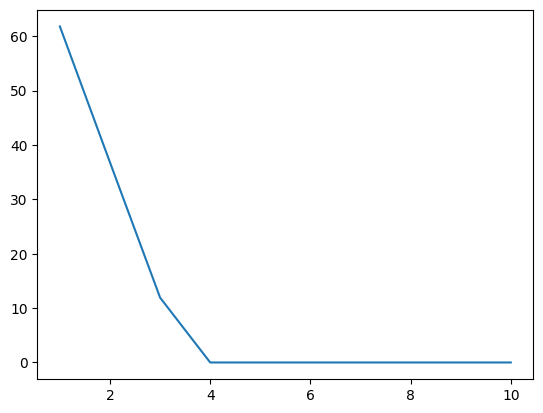

                                          Estratégia  Cluster_Estratégia
0     Ver quanto ele ganha, tirar o gasto e dividir.                   1
1     Ver quanto ele ganha, tirar o gasto e dividir.                   1
2              Somar tudo, tirar 15 e dividir por 3.                   2
3  Calcular o total ganho na semana, subtrair o g...                   0
4  Calcular o total ganho na semana, subtrair o g...                   0
5  Calcular o total ganho na semana, subtrair o g...                   0
6  Multiplicar 12 por 5, subtrair 15 e dividir po...                   2
7  Multiplicar 12 por 5, subtrair 15 e dividir po...                   2
8  Calcular o total ganho na semana, subtrair o g...                   0
9  Calcular o total ganho na semana, subtrair o g...                   0


In [55]:

textos = df['Estratégia'].tolist()

def tokenizar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    tokens = texto.split()
    return tokens

textos_tokenizados = [tokenizar_texto(texto) for texto in textos]


textos_strings = [" ".join(tokens) for tokens in textos_tokenizados]


vetorizador = TfidfVectorizer()
vetores_tfidf = vetorizador.fit_transform(textos_strings)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vetores_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(vetores_tfidf)


df['Cluster_Estratégia'] = clusters

print(df[['Estratégia', 'Cluster_Estratégia']].head(10))

---

### Calculo/Tecnica

/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to dup

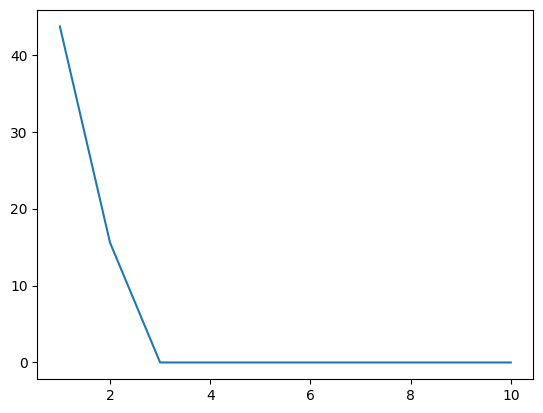

                          Cálculo/Técnica  Cluster_Cálculo/Técnica
0  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
1  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
2  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
3  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
4  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
5  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
6  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
7  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
8  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0
9  12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15                        0


In [56]:

textos = df['Cálculo/Técnica'].tolist()

def tokenizar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    tokens = texto.split()
    return tokens

textos_tokenizados = [tokenizar_texto(texto) for texto in textos]


textos_strings = [" ".join(tokens) for tokens in textos_tokenizados]


vetorizador = TfidfVectorizer()
vetores_tfidf = vetorizador.fit_transform(textos_strings)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vetores_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(vetores_tfidf)


df['Cluster_Cálculo/Técnica'] = clusters

print(df[['Cálculo/Técnica', 'Cluster_Cálculo/Técnica']].head(10))

---

### Resposta

/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/laza/estudo01-dados-manguetech/venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to dup

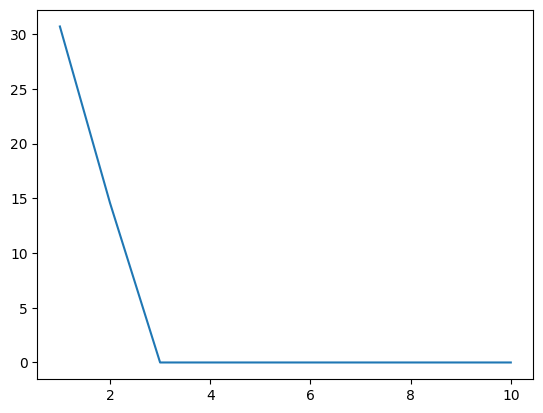

                      Resposta  Cluster_Resposta
0  Cada irmão recebeu R$15,00.                 0
1  Cada irmão recebeu -R$1,00.                 2
2   Cada irmão recebeu R$0,66.                 1
3  Cada irmão recebeu -R$1,00.                 2
4  Cada irmão recebeu R$15,00.                 0
5  Cada irmão recebeu -R$1,00.                 2
6  Cada irmão recebeu R$15,00.                 0
7  Cada irmão recebeu -R$1,00.                 2
8  Cada irmão recebeu R$15,00.                 0
9  Cada irmão recebeu R$15,00.                 0


In [57]:

textos = df['Resposta'].tolist()

def tokenizar_texto(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    tokens = texto.split()
    return tokens

textos_tokenizados = [tokenizar_texto(texto) for texto in textos]


textos_strings = [" ".join(tokens) for tokens in textos_tokenizados]


vetorizador = TfidfVectorizer()
vetores_tfidf = vetorizador.fit_transform(textos_strings)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vetores_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(vetores_tfidf)


df['Cluster_Resposta'] = clusters

print(df[['Resposta', 'Cluster_Resposta']].head(10))

---

## ETAPA 04

In [58]:
import prince

### ACM

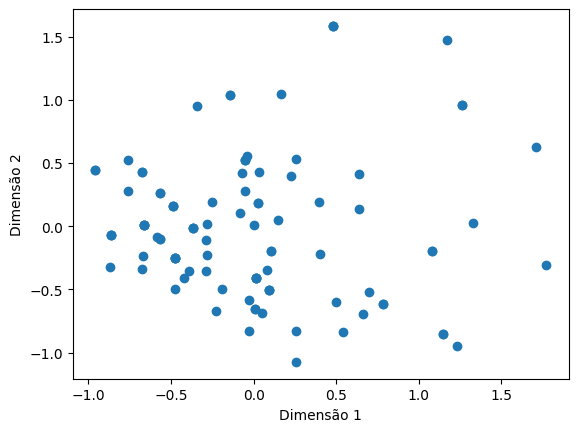

In [59]:

df = pd.read_csv('/home/laza/simulacao-manguetech-01/analise_02/respostas_estudantes.csv')

mca = prince.MCA(n_components=2)

mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

plt.scatter(coordenadas_estudantes[0], coordenadas_estudantes[1])
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.show()

---

### k-means / ACM

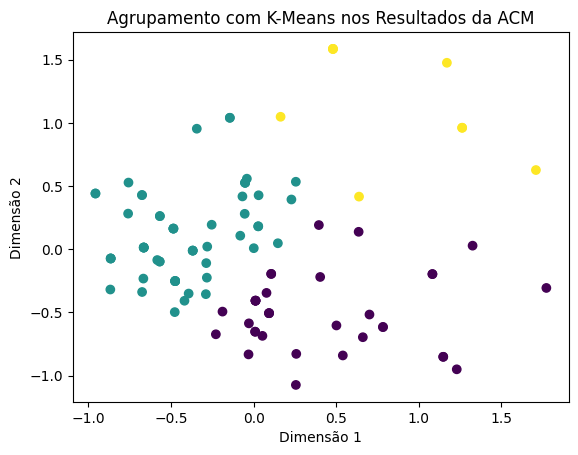

                                       Interpretação  \
0  Thiago tem um gasto de 15 reais e ganha 12 rea...   
1  Thiago trabalha 5 dias, ganha 12 por dia, tira...   
2  Thiago trabalha 5 dias na semana e ganha 12 re...   
3  Thiago ganha 12 reais por dia de segunda a sex...   
4  Thiago ganha 12 reais por dia de segunda a sex...   
5  Thiago tem um gasto de 15 reais e ganha 12 rea...   
6  Thiago tem um gasto de 15 reais e ganha 12 rea...   
7  Thiago tem um gasto de 15 reais e ganha 12 rea...   
8  Thiago trabalha 5 dias, ganha 12 por dia, tira...   
9  Thiago trabalha 5 dias na semana e ganha 12 re...   

                                          Estratégia  \
0     Ver quanto ele ganha, tirar o gasto e dividir.   
1     Ver quanto ele ganha, tirar o gasto e dividir.   
2              Somar tudo, tirar 15 e dividir por 3.   
3  Calcular o total ganho na semana, subtrair o g...   
4  Calcular o total ganho na semana, subtrair o g...   
5  Calcular o total ganho na semana, subtrair o

In [60]:

mca = prince.MCA(n_components=2)


mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(coordenadas_estudantes)

df['Cluster_ACM_KMeans'] = clusters

plt.scatter(coordenadas_estudantes[0], coordenadas_estudantes[1], c=clusters)
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.title('Agrupamento com K-Means nos Resultados da ACM')
plt.show()

print(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Cluster_ACM_KMeans']].head(10))

---

# ETAPA 05

### Analise de erros

Erros cometidos(geral)

In [61]:

mca = prince.MCA(n_components=2)

mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coordenadas_estudantes)

df_copy = df.copy()
df_copy['Cluster_ACM_KMeans'] = clusters

df = df_copy

print(df.columns)

df['Tipo_Erro_Detalhado'] = 'Sem Erro'
for index, row in df[df['Cluster_ACM_KMeans'] == 1].iterrows():
    if row['Resposta'] != 'Cada irmão recebeu R$15,00.':
        if 'R$' in row['Resposta']:
            if '35' in row['Resposta']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Erro de Subtração'
            elif '22,50' in row['Resposta']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Erro de Divisão'
            elif '-' in row['Resposta']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Erro na Ordem das Operações'
            else:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Outro Erro de Cálculo'
        else:
            if '12 reais e gastou 15 reais' in row['Interpretação']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Dificuldade em Identificar Informações Relevantes'
            elif '12 + 5 - 15 / 3' in row['Estratégia']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Dificuldade em Traduzir o Problema para Representação Matemática'
            elif '15 / 3 = 5' in row['Resposta']:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Compreensão Incorreta do Problema'
            else:
                df.loc[index, 'Tipo_Erro_Detalhado'] = 'Outro Erro de Interpretação'

print(df[['Resposta', 'Tipo_Erro_Detalhado', 'Cluster_ACM_KMeans']])

Index(['Nome', 'Ano', 'Problema', 'Interpretação', 'Estratégia',
       'Cálculo/Técnica', 'Resposta', 'Cluster_ACM_KMeans'],
      dtype='object')
                       Resposta          Tipo_Erro_Detalhado  \
0   Cada irmão recebeu R$15,00.                     Sem Erro   
1   Cada irmão recebeu -R$1,00.  Erro na Ordem das Operações   
2    Cada irmão recebeu R$0,66.                     Sem Erro   
3   Cada irmão recebeu -R$1,00.  Erro na Ordem das Operações   
4   Cada irmão recebeu R$15,00.                     Sem Erro   
..                          ...                          ...   
95  Cada irmão recebeu R$15,00.                     Sem Erro   
96   Cada irmão recebeu R$0,66.                     Sem Erro   
97   Cada irmão recebeu R$0,66.                     Sem Erro   
98  Cada irmão recebeu R$15,00.                     Sem Erro   
99   Cada irmão recebeu R$0,66.                     Sem Erro   

    Cluster_ACM_KMeans  
0                    1  
1                    1  
2       

---

Frequencia de erros

In [62]:

frequencia_erros = df['Tipo_Erro_Detalhado'].value_counts()
print("Frequência dos Erros:\n", frequencia_erros)

erros_por_cluster = df.groupby('Cluster_ACM_KMeans')['Tipo_Erro_Detalhado'].value_counts()
print("\nErros por Cluster:\n", erros_por_cluster)

Frequência dos Erros:
 Tipo_Erro_Detalhado
Sem Erro                       87
Erro na Ordem das Operações    11
Outro Erro de Cálculo           2
Name: count, dtype: int64

Erros por Cluster:
 Cluster_ACM_KMeans  Tipo_Erro_Detalhado        
0                   Sem Erro                       35
1                   Sem Erro                       43
                    Erro na Ordem das Operações    11
                    Outro Erro de Cálculo           2
2                   Sem Erro                        9
Name: count, dtype: int64


---

Erros no cluster 0

In [63]:
import pandas as pd
from sklearn.cluster import KMeans
import prince

df = pd.read_csv('/home/laza/simulacao-manguetech-01/analise_02/respostas_estudantes.csv')

mca = prince.MCA(n_components=2)

mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coordenadas_estudantes)

df_copy = df.copy()
df_copy['Cluster_ACM_KMeans'] = clusters

df = df_copy

df['Erro_Interpretacao'] = ''
df['Erro_Estrategia'] = ''
df['Erro_Calculo_Tecnica'] = ''
df['Erro_Resposta'] = ''

for index, row in df[df['Cluster_ACM_KMeans'] == 0].iterrows():
    if row['Resposta'] != 'Cada irmão recebeu R$15,00.':
        if 'R$' in row['Resposta']:
            if '35' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Subtração'
            elif '22,50' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Divisão'
            elif '-' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro na Ordem das Operações'
            else:
                df.loc[index, 'Erro_Resposta'] = 'Outro Erro de Cálculo'
        else:
            if '12 reais e gastou 15 reais' in row['Interpretação']:
                df.loc[index, 'Erro_Interpretacao'] = 'Dificuldade em Identificar Informações Relevantes'
            elif '12 + 5 - 15 / 3' in row['Estratégia']:
                df.loc[index, 'Erro_Estrategia'] = 'Dificuldade em Traduzir o Problema para Representação Matemática'
            elif '15 / 3 = 5' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Compreensão Incorreta do Problema'
            else:
                df.loc[index, 'Erro_Interpretacao'] = 'Outro Erro de Interpretação'

print("Erros no Cluster 0:")
print(df[df['Cluster_ACM_KMeans'] == 1][['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Erro_Interpretacao', 'Erro_Estrategia', 'Erro_Calculo_Tecnica', 'Erro_Resposta']])

print("\nContagem de Erros no Cluster 0:")
print("Erro de Interpretação:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Interpretacao'].value_counts())
print("\nErro de Estratégia:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Estrategia'].value_counts())
print("\nErro de Resposta:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Resposta'].value_counts())

Erros no Cluster 0:
                                        Interpretação  \
0   Thiago tem um gasto de 15 reais e ganha 12 rea...   
1   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
3   Thiago ganha 12 reais por dia de segunda a sex...   
4   Thiago ganha 12 reais por dia de segunda a sex...   
5   Thiago tem um gasto de 15 reais e ganha 12 rea...   
6   Thiago tem um gasto de 15 reais e ganha 12 rea...   
7   Thiago tem um gasto de 15 reais e ganha 12 rea...   
8   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
10  Thiago ganha 12 reais por dia de segunda a sex...   
11  Thiago vende água e doces, ganha 12 reais por ...   
12  Thiago ganha 12 reais por dia de segunda a sex...   
13  Thiago tem um gasto de 15 reais e ganha 12 rea...   
14  Thiago tem um gasto de 15 reais e ganha 12 rea...   
17  Thiago ganha 12 reais por dia de segunda a sex...   
19  Thiago tem um gasto de 15 reais e ganha 12 rea...   
20  Thiago vende água e doces, ganha 12 reais por ...   
21  Thiago 

---

Erros no cluster 1

In [64]:

mca = prince.MCA(n_components=2)

mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coordenadas_estudantes)

df_copy = df.copy()
df_copy['Cluster_ACM_KMeans'] = clusters

df = df_copy

df['Erro_Interpretacao'] = ''
df['Erro_Estrategia'] = ''
df['Erro_Calculo_Tecnica'] = ''
df['Erro_Resposta'] = ''

for index, row in df[df['Cluster_ACM_KMeans'] == 1].iterrows():
    if row['Resposta'] != 'Cada irmão recebeu R$15,00.':
        if 'R$' in row['Resposta']:
            if '35' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Subtração'
            elif '22,50' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Divisão'
            elif '-' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro na Ordem das Operações'
            else:
                df.loc[index, 'Erro_Resposta'] = 'Outro Erro de Cálculo'
        else:
            if '12 reais e gastou 15 reais' in row['Interpretação']:
                df.loc[index, 'Erro_Interpretacao'] = 'Dificuldade em Identificar Informações Relevantes'
            elif '12 + 5 - 15 / 3' in row['Estratégia']:
                df.loc[index, 'Erro_Estrategia'] = 'Dificuldade em Traduzir o Problema para Representação Matemática'
            elif '15 / 3 = 5' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Compreensão Incorreta do Problema'
            else:
                df.loc[index, 'Erro_Interpretacao'] = 'Outro Erro de Interpretação'

print("Erros no Cluster 1:")
print(df[df['Cluster_ACM_KMeans'] == 1][['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Erro_Interpretacao', 'Erro_Estrategia', 'Erro_Calculo_Tecnica', 'Erro_Resposta']])

print("\nContagem de Erros no Cluster 1:")
print("Erro de Interpretação:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Interpretacao'].value_counts())
print("\nErro de Estratégia:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Estrategia'].value_counts())
print("\nErro de Resposta:\n", df[df['Cluster_ACM_KMeans'] == 1]['Erro_Resposta'].value_counts())

Erros no Cluster 1:
                                        Interpretação  \
0   Thiago tem um gasto de 15 reais e ganha 12 rea...   
1   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
3   Thiago ganha 12 reais por dia de segunda a sex...   
4   Thiago ganha 12 reais por dia de segunda a sex...   
5   Thiago tem um gasto de 15 reais e ganha 12 rea...   
6   Thiago tem um gasto de 15 reais e ganha 12 rea...   
7   Thiago tem um gasto de 15 reais e ganha 12 rea...   
8   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
10  Thiago ganha 12 reais por dia de segunda a sex...   
11  Thiago vende água e doces, ganha 12 reais por ...   
12  Thiago ganha 12 reais por dia de segunda a sex...   
13  Thiago tem um gasto de 15 reais e ganha 12 rea...   
14  Thiago tem um gasto de 15 reais e ganha 12 rea...   
17  Thiago ganha 12 reais por dia de segunda a sex...   
19  Thiago tem um gasto de 15 reais e ganha 12 rea...   
20  Thiago vende água e doces, ganha 12 reais por ...   
21  Thiago 

---

Erros no cluster 2

In [65]:
import pandas as pd
from sklearn.cluster import KMeans
import prince

df = pd.read_csv('/home/laza/simulacao-manguetech-01/analise_02/respostas_estudantes.csv')

mca = prince.MCA(n_components=2)

mca = mca.fit(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

coordenadas_estudantes = mca.row_coordinates(df[['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta']])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(coordenadas_estudantes)

df_copy = df.copy()
df_copy['Cluster_ACM_KMeans'] = clusters

df = df_copy

df['Erro_Interpretacao'] = ''
df['Erro_Estrategia'] = ''
df['Erro_Calculo_Tecnica'] = ''
df['Erro_Resposta'] = ''

for index, row in df[df['Cluster_ACM_KMeans'] == 2].iterrows():
    if row['Resposta'] != 'Cada irmão recebeu R$15,00.':
        if 'R$' in row['Resposta']:
            if '35' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Subtração'
            elif '22,50' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro de Divisão'
            elif '-' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Erro na Ordem das Operações'
            else:
                df.loc[index, 'Erro_Resposta'] = 'Outro Erro de Cálculo'
        else:
            if '12 reais e gastou 15 reais' in row['Interpretação']:
                df.loc[index, 'Erro_Interpretacao'] = 'Dificuldade em Identificar Informações Relevantes'
            elif '12 + 5 - 15 / 3' in row['Estratégia']:
                df.loc[index, 'Erro_Estrategia'] = 'Dificuldade em Traduzir o Problema para Representação Matemática'
            elif '15 / 3 = 5' in row['Resposta']:
                df.loc[index, 'Erro_Resposta'] = 'Compreensão Incorreta do Problema'
            else:
                df.loc[index, 'Erro_Interpretacao'] = 'Outro Erro de Interpretação'

print("Erros no Cluster 2:")
print(df[df['Cluster_ACM_KMeans'] == 1][['Interpretação', 'Estratégia', 'Cálculo/Técnica', 'Resposta', 'Erro_Interpretacao', 'Erro_Estrategia', 'Erro_Calculo_Tecnica', 'Erro_Resposta']])

print("\nContagem de Erros no Cluster 2:")
print("Erro de Interpretação:\n", df[df['Cluster_ACM_KMeans'] == 2]['Erro_Interpretacao'].value_counts())
print("\nErro de Estratégia:\n", df[df['Cluster_ACM_KMeans'] == 2]['Erro_Estrategia'].value_counts())
print("\nErro de Resposta:\n", df[df['Cluster_ACM_KMeans'] == 2]['Erro_Resposta'].value_counts())

Erros no Cluster 2:
                                        Interpretação  \
0   Thiago tem um gasto de 15 reais e ganha 12 rea...   
1   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
3   Thiago ganha 12 reais por dia de segunda a sex...   
4   Thiago ganha 12 reais por dia de segunda a sex...   
5   Thiago tem um gasto de 15 reais e ganha 12 rea...   
6   Thiago tem um gasto de 15 reais e ganha 12 rea...   
7   Thiago tem um gasto de 15 reais e ganha 12 rea...   
8   Thiago trabalha 5 dias, ganha 12 por dia, tira...   
10  Thiago ganha 12 reais por dia de segunda a sex...   
11  Thiago vende água e doces, ganha 12 reais por ...   
12  Thiago ganha 12 reais por dia de segunda a sex...   
13  Thiago tem um gasto de 15 reais e ganha 12 rea...   
14  Thiago tem um gasto de 15 reais e ganha 12 rea...   
17  Thiago ganha 12 reais por dia de segunda a sex...   
19  Thiago tem um gasto de 15 reais e ganha 12 rea...   
20  Thiago vende água e doces, ganha 12 reais por ...   
21  Thiago 

---


In [66]:
df.head()

,Nome,Ano,Problema,Interpretação,Estratégia,Cálculo/Técnica,Resposta,Cluster_ACM_KMeans,Erro_Interpretacao,Erro_Estrategia,Erro_Calculo_Tecnica,Erro_Resposta
0,Estudante 1,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago tem um gasto de 15 reais e ganha 12 rea...,"Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00.",1,,,,
1,Estudante 2,9,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago trabalha 5 dias, ganha 12 por dia, tira...","Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu -R$1,00.",1,,,,
2,Estudante 3,8,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Somar tudo, tirar 15 e dividir por 3.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66.",0,,,,
3,Estudante 4,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago ganha 12 reais por dia de segunda a sex...,"Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu -R$1,00.",1,,,,
4,Estudante 5,7,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago ganha 12 reais por dia de segunda a sex...,"Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00.",1,,,,


---

# Etapa 06

### Graficos

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

---

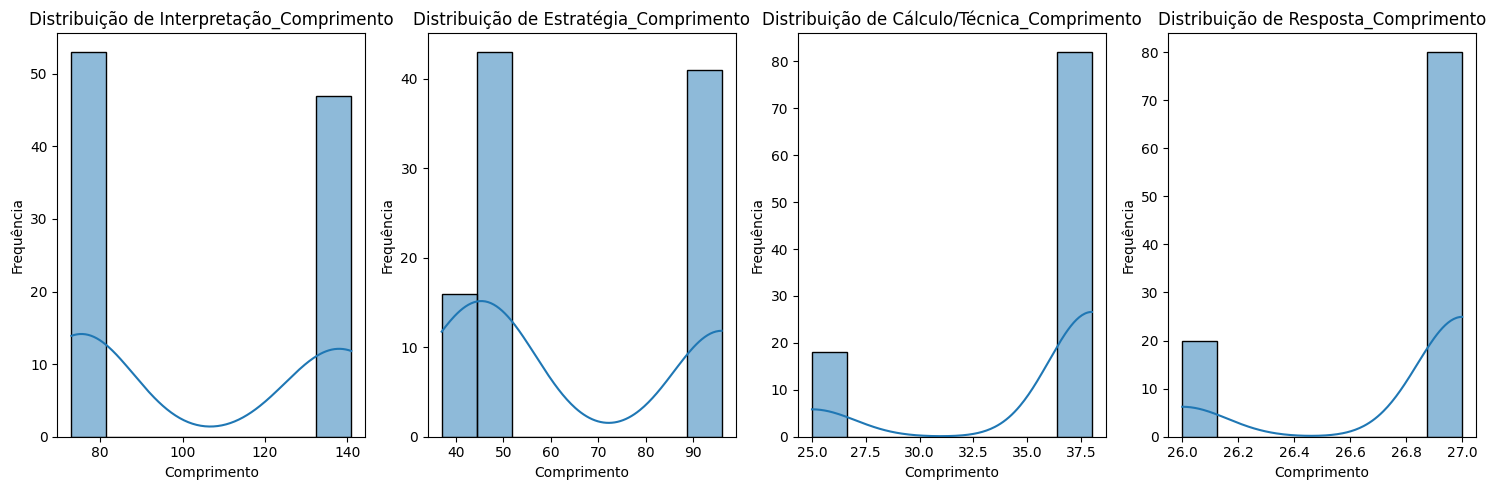

In [ ]:

df = pd.read_csv('/home/laza/estudo01-dados-manguetech/respostas_estudantes_modificado.csv')

if 'Interpretação' in df.columns:
    df['Interpretação_Comprimento'] = df['Interpretação'].str.len()
if 'Estratégia' in df.columns:
    df['Estratégia_Comprimento'] = df['Estratégia'].str.len()
if 'Cálculo/Técnica' in df.columns:
    df['Cálculo/Técnica_Comprimento'] = df['Cálculo/Técnica'].str.len()
if 'Resposta' in df.columns:
    df['Resposta_Comprimento'] = df['Resposta'].str.len()

comprimentos = ['Interpretação_Comprimento', 'Estratégia_Comprimento',
                'Cálculo/Técnica_Comprimento', 'Resposta_Comprimento']

plt.figure(figsize=(15, 5))
for i, col in enumerate(comprimentos):
    if col in df.columns: 
        plt.subplot(1, 4, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribuição de {col}')
        plt.xlabel('Comprimento')
        plt.ylabel('Frequência')
    else:
        print(f"A coluna '{col}' não foi encontrada no DataFrame.")

plt.tight_layout()
plt.show()

---

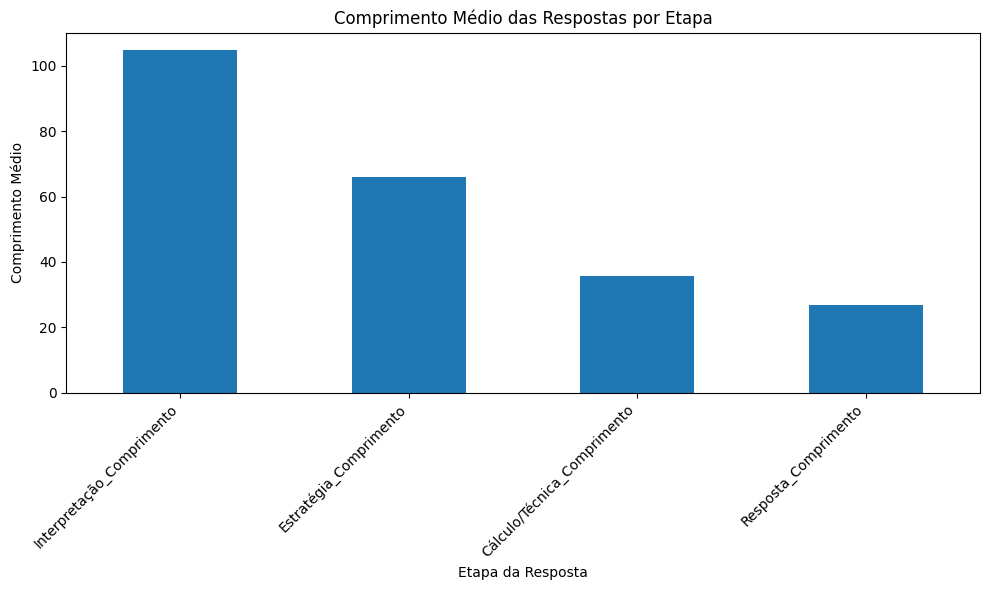

In [71]:
comprimentos = ['Interpretação_Comprimento', 'Estratégia_Comprimento',
                'Cálculo/Técnica_Comprimento', 'Resposta_Comprimento']
medias = df[comprimentos].mean()

plt.figure(figsize=(10, 6))
medias.plot(kind='bar')
plt.title('Comprimento Médio das Respostas por Etapa')
plt.xlabel('Etapa da Resposta')
plt.ylabel('Comprimento Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

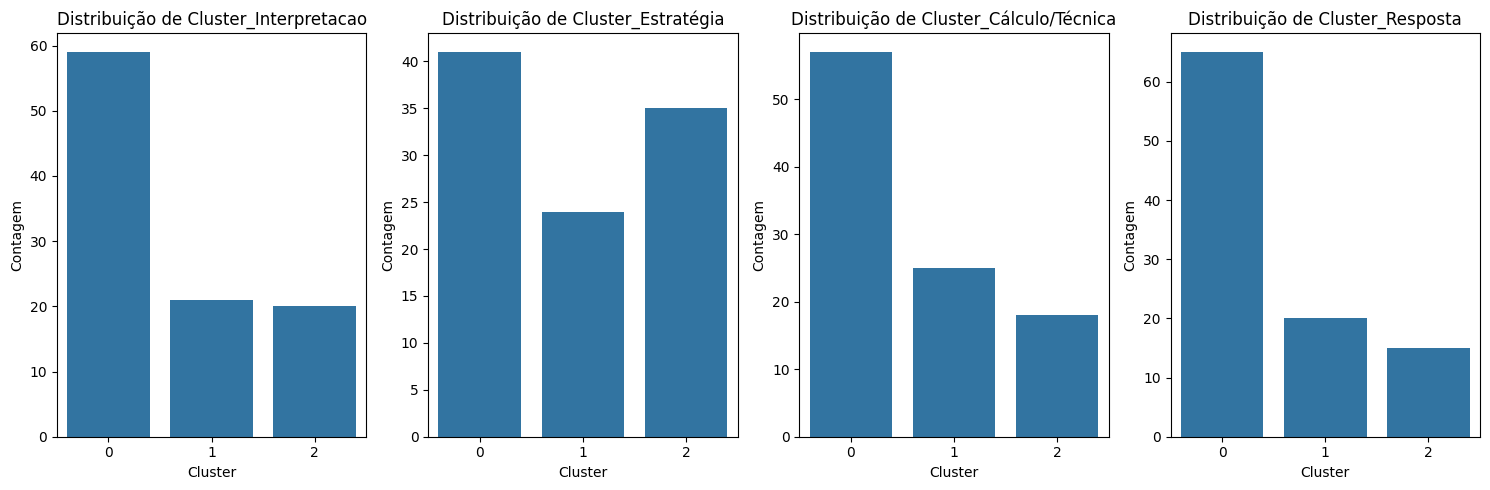

In [ ]:

clusters = ['Cluster_Interpretacao', 'Cluster_Estratégia',
            'Cluster_Cálculo/Técnica', 'Cluster_Resposta']

plt.figure(figsize=(15, 5))
for i, col in enumerate(clusters):
    if col in df.columns: 
        plt.subplot(1, 4, i + 1)
        sns.countplot(data=df, x=col)
        plt.title(f'Distribuição de {col}')
        plt.xlabel('Cluster')
        plt.ylabel('Contagem')
    else:
        print(f"A coluna '{col}' não foi encontrada no DataFrame.")

plt.tight_layout()
plt.show()

---

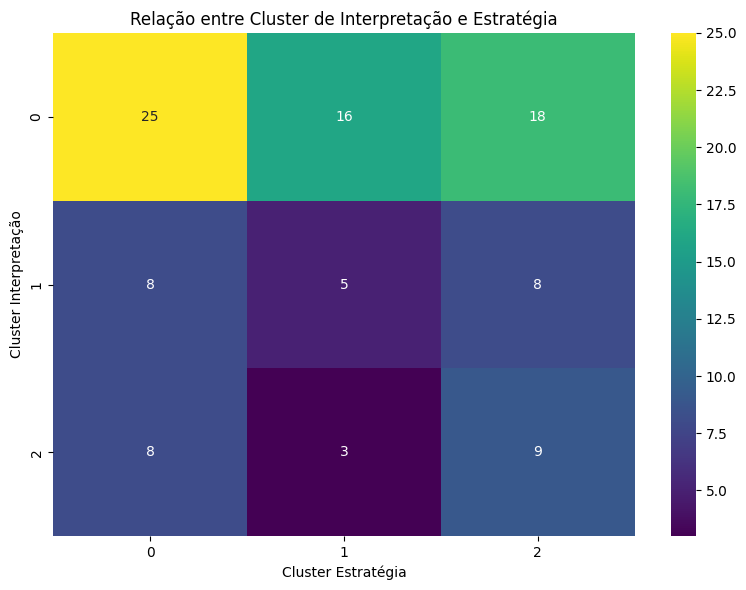

In [77]:
cross_tab = pd.crosstab(df['Cluster_Interpretacao'], df['Cluster_Estratégia'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.title('Relação entre Cluster de Interpretação e Estratégia')
plt.xlabel('Cluster Estratégia')
plt.ylabel('Cluster Interpretação')
plt.tight_layout()
plt.show()

---

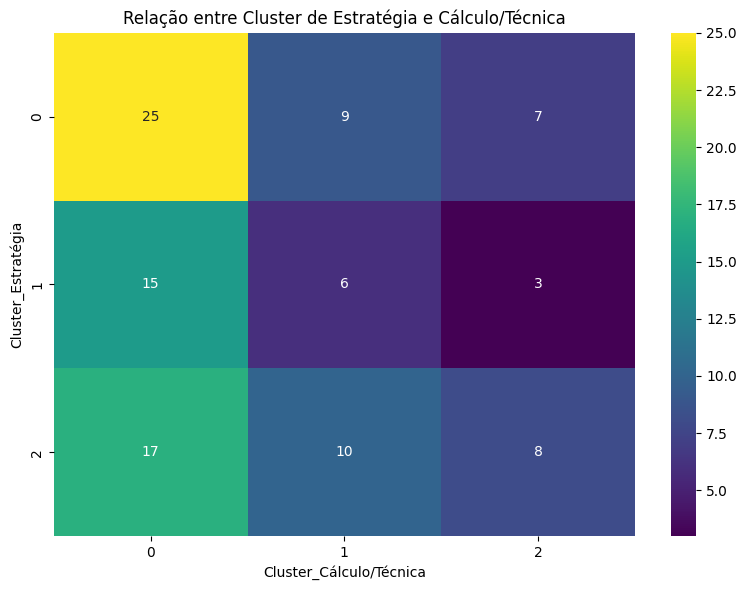

In [80]:
cross_tab = pd.crosstab(df['Cluster_Estratégia'], df['Cluster_Cálculo/Técnica'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.title('Relação entre Cluster de Estratégia e Cálculo/Técnica')
plt.xlabel('Cluster_Cálculo/Técnica')
plt.ylabel('Cluster_Estratégia')
plt.tight_layout()
plt.show()

---

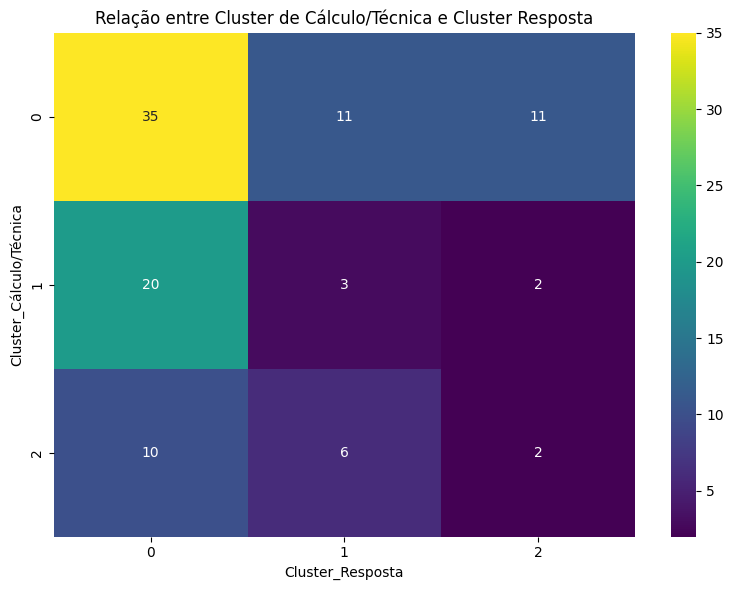

In [81]:
cross_tab = pd.crosstab(df['Cluster_Cálculo/Técnica'], df['Cluster_Resposta'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.title('Relação entre Cluster de Cálculo/Técnica e Cluster Resposta')
plt.xlabel('Cluster_Resposta')
plt.ylabel('Cluster_Cálculo/Técnica')
plt.tight_layout()
plt.show()

---

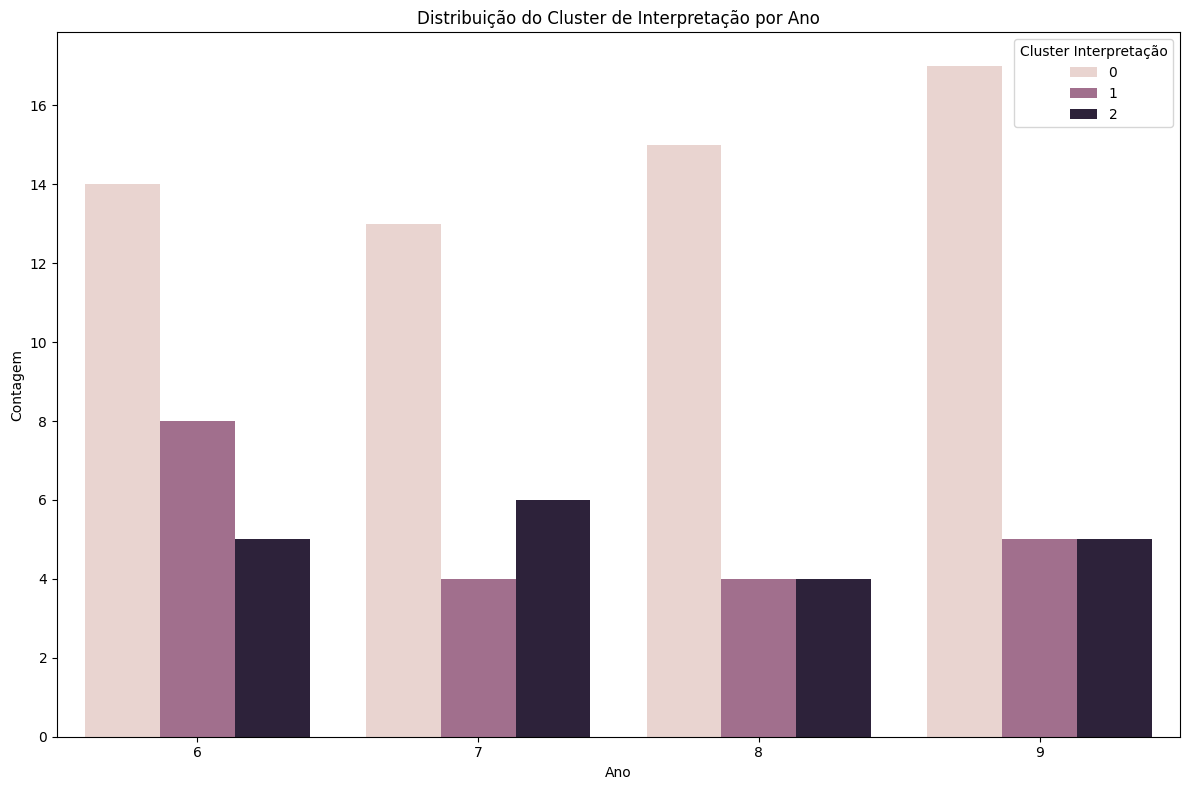

In [78]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Ano', hue='Cluster_Interpretacao')
plt.title('Distribuição do Cluster de Interpretação por Ano')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.legend(title='Cluster Interpretação')
plt.tight_layout()
plt.show()